### Tests


In [12]:
# Function for integreating ODE and displaying results
import scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

#### Simplest system - monoexponential decay

$dy/dt = -a \cdot y$

Solution:
$y = c e^{-at}$

In [13]:
def f(y,t,a):
    dydt = -a*y[0]
    return dydt

# points in time where the function gets evaluated, t[0] at y0
t  = scipy.linspace(0.,10.,201)
# init conc
y0 = [16.]

# rate
a=0.5  # 
y = scipy.integrate.odeint(f,y0,t,args=(a,))

Below are the data from the class demonstration

In [14]:
# class data

yClass = [16.,8.,4.,2.,1.]
tClass = np.arange(5)  # t=0,1,2,3,4


Here we compare results. Why do the class results deviate from the analytical solution? 

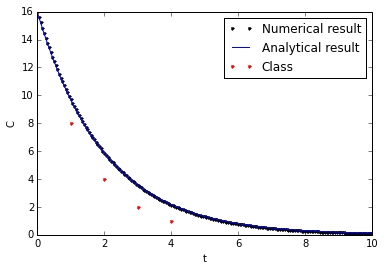

In [15]:
plt.plot(t,y,'k.',label="Numerical result")

analyticalResult = y[0]*np.exp(-a*t)
plt.plot(t,analyticalResult,label="Analytical result")

plt.plot(tClass,yClass,'r.',label="Class")

plt.ylabel("C")
plt.xlabel("t")
plt.legend()

#### Simple system - two components
\begin{align}
\dot{y_0} &= -a_{00} y_0 \\
\dot{y_1} &= -a_{11} y_1 \\
\end{align}

Using Jacobian:
 ( $a_{ij} = \frac{dy_i}{da_j}$)
 
 
First verifying that diagonal Jacobian with negative rate constants yields exponential decay

$\frac{dy[0]}{dt} = a\cdot y[0] +b\cdot y[1]$

$\frac{dy[1]}{dt} = c\cdot y[0]+d\cdot y[1]$ 

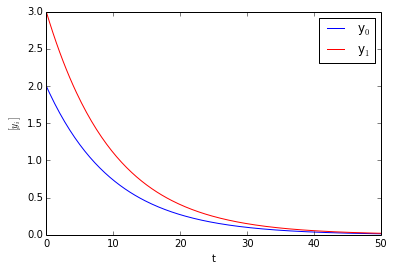

In [20]:

def f(y,t,a):
  return np.dot(a,y)
#    return [a[0,0]*y[0] + a[0,1]*y[1],\
#            a[1,0]*y[0] + a[1,1]*y[1]]


t  = scipy.linspace(0.,50.,201)

# Initial conc. 
y0 = [2,3]

# Jacobian
J = 0.1*np.array([[-1.0,0.],[0,-1.]])

y = scipy.integrate.odeint(f,y0,t,args=(J,))
plt.plot(t,y[:,0],"b-",label="y$_0$")
plt.plot(t,y[:,1],"r-",label="y$_1$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.legend(loc=0)


#### Simple system - two components in equilibrium

$y_0 \leftrightarrow y_1$

\begin{align}
\dot{y_0} &= -k_f y_0 + k_m y_1\\
\dot{y_1} &=  k_f y_0 - k_m y_1 \\
\end{align}



In [21]:

# Jacobian
kf=3.0
kb=1.0
J1 = np.array([
  [-kf,kb],
  [kf,-kb],
])   
t  = scipy.linspace(0.,1.,201)

# our initial concentration 
y0 = 12
y1 = 4

ys = np.array([y0,y1],dtype=np.float)
daSum = np.sum(ys)
y = scipy.integrate.odeint(f,ys,t,args=(J1,))


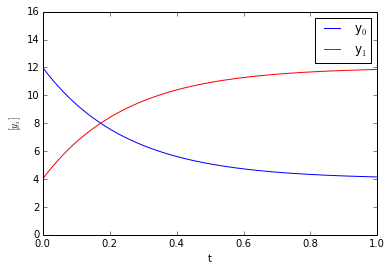

In [22]:

plt.plot(t,y[:,0],"b-",label="y$_0$")
plt.plot(t,y[:,1],"r-",label="y$_1$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.ylim([0,daSum])
plt.legend(loc=0)


#### Multi-component system with transition probability matrix J

Using Jacobian:
 ( $a_{ij} = \frac{dy_i}{da_j}$)
 
 

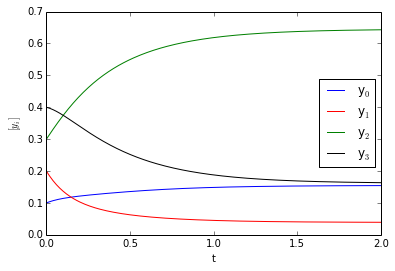

In [23]:
# points in time where the function gets evaluated, t[0] at y0
t  = scipy.linspace(0.,2.,201)



# Jacobian
a=0.5
b=2.0
g=5.
d=1.2
J = np.array([
  [-(a+g),b,d,0],
  [a,-(b+g),0,d],
  [g,0,-(a+d),b],
  [0,g,a,-(b+d)]
])   
# Initial conc. 
y0 = np.array([1,2,3,4],dtype=np.float)
y0 /= np.sum(y0)


y = scipy.integrate.odeint(f,y0,t,args=(J,))
plt.plot(t,y[:,0],"b-",label="y$_0$")
plt.plot(t,y[:,1],"r-",label="y$_1$")
plt.plot(t,y[:,2],"g-",label="y$_2$")
plt.plot(t,y[:,3],"k-",label="y$_3$")
plt.ylabel("$[y_i]$")
plt.xlabel("t")
plt.legend(loc=0)


#### Grab bag

Would like to relate this to an eigenvalue decomposition of a markovian process

In [24]:

print np.linalg.eig(J)

(array([ -8.70000000e+00,  -6.20000000e+00,  -5.08274826e-17,
        -2.50000000e+00]), array([[ 0.5       , -0.68599434,  0.22640502, -0.1650196 ],
       [-0.5       , -0.17149859,  0.05660125,  0.1650196 ],
       [-0.5       ,  0.68599434,  0.94335425, -0.68758166],
       [ 0.5       ,  0.17149859,  0.23583856,  0.68758166]]))


%%latex

\begin{equation}
A \leftarrow k_f, k_b\rightarrow B 
\end{equation}

\begin{align}
A_0 &= 12 & B_0 &= 4\\
k_f &= 3. & k_b &= 1\\
A_f &= 4 & B_f &= 12
\end{align}

In [25]:
kf=3.0
kb=1.0
J1 = np.array([
  [-kf,kb],
  [kf,-kb],
]) 

In [26]:
r = 1*0.1

yN = np.array([12,4],dtype=np.float)
y0 = yN

iters = np.arange(5)
for i in iters:
  y0 = yN  
  dydt = np.dot(J1,y0 )
  print "Iter ", i
  print "y0 ", y0  
  print "dy ", dydt*r
  yN = y0 + dydt*r
  print "yN ", yN


    
print "kb/kf", kb/kf    
print "A/B", yN[0]/yN[1]

Iter  0
y0  [ 12.   4.]
dy  [-3.2  3.2]
yN  [ 8.8  7.2]
Iter  1
y0  [ 8.8  7.2]
dy  [-1.92  1.92]
yN  [ 6.88  9.12]
Iter  2
y0  [ 6.88  9.12]
dy  [-1.152  1.152]
yN  [  5.728  10.272]
Iter  3
y0  [  5.728  10.272]
dy  [-0.6912  0.6912]
yN  [  5.0368  10.9632]
Iter  4
y0  [  5.0368  10.9632]
dy  [-0.41472  0.41472]
yN  [  4.62208  11.37792]
kb/kf 0.333333333333
A/B 0.406232422095


In [12]:
y0

array([  5.0368,  10.9632])